In [28]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [29]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
LARGE_SIZE = 14

plt.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
plt.rc('text', usetex=True)

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=LARGE_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=LARGE_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=LARGE_SIZE)   # fontsize of the figure title

rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'

In [15]:
ocean = xr.open_dataset('/home/evankielley/Downloads/global-analysis-forecast-phy-001-024-monthly-april-2018.nc')

In [16]:
ocean

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 721, longitude: 721, time: 2)
Coordinates:
  * latitude   (latitude) float32 30.0 30.083334 30.166666 ... 89.916664 90.0
  * depth      (depth) float32 0.494025
  * time       (time) datetime64[ns] 2018-04-16 2018-05-16T12:00:00
  * longitude  (longitude) float32 -90.0 -89.916664 ... -30.083334 -30.0
Data variables:
    mlotst     (time, latitude, longitude) float32 ...
    siconc     (time, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
    usi        (time, latitude, longitude) float32 ...
    sithick    (time, latitude, longitude) float32 ...
    bottomT    (time, latitude, longitude) float32 ...
    vsi        (time, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
    zos        (time, latitude, longitude) float32 

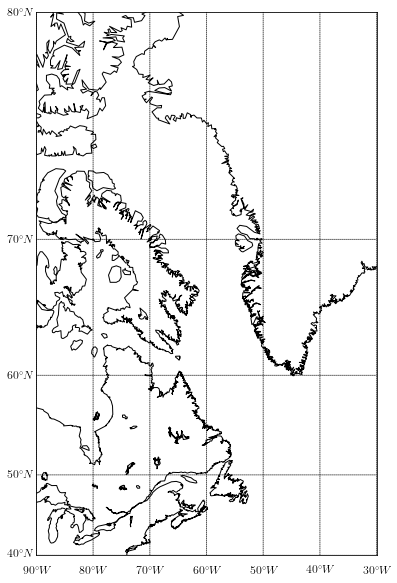

In [30]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)


map_ = Basemap(projection='merc',
                  lon_0=-50,
                  lat_0=50,
                  lat_ts=50,
                  resolution='l',
                  llcrnrlon=-90,
                  llcrnrlat=40,
                  urcrnrlon=-30,
                  urcrnrlat=80,)

map_.drawcoastlines()
parallels = map_.drawparallels(np.arange(0, 90, 10), labels=[1, 0, 0, 0])
meridians = map_.drawmeridians(np.arange(0, 360, 10), labels=[0, 0, 0, 1])

plt.show()

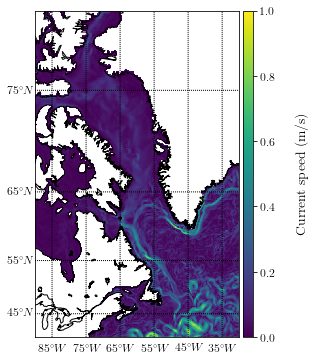

In [32]:
lons, lats = ocean.longitude.values, ocean.latitude.values
us, vs = ocean.uo.values[0, 0, :, :], ocean.vo.values[0, 0, :, :]
speeds = np.sqrt(us**2 + vs**2)

x, y = map_(lons, lats)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

map_.pcolor(x, y, speeds, vmin=0, vmax=1)

map_.drawcoastlines()

parallels = map_.drawparallels(np.arange(5, 85, 10), labels=[1, 0, 0, 0])
meridians = map_.drawmeridians(np.arange(5, 355, 10), labels=[0, 0, 0, 1])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = plt.colorbar(cax=cax)
cbar.ax.get_yaxis().labelpad = 20
cbar.ax.set_ylabel('Current speed (m/s)', rotation=90)

fig.savefig('./plots/iceberg_origins_og.pdf', bbox_inches='tight')
plt.show()